In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import tensorflow as tf

from sklearn.datasets import load_iris
from sklearn.decomposition import PCA
from sklearn.metrics import accuracy_score, precision_score, recall_score
from sklearn.model_selection import train_test_split
from tensorflow.keras import layers, losses
from tensorflow.keras.datasets import fashion_mnist
from tensorflow.keras.models import Model

In [2]:
data, labels = load_iris(return_X_y=True)
train_data, test_data, train_labels, test_labels = train_test_split(
    data, labels, test_size=0.2, random_state=21
)
data.shape

(150, 4)

In [39]:
latent_dim = 2 

class Autoencoder(Model):
  def __init__(self, latent_dim):
    super(Autoencoder, self).__init__()
    self.latent_dim = latent_dim   
    self.encoder = tf.keras.Sequential([
      layers.Flatten(),
      layers.Dense(150, activation='relu'),
      layers.BatchNormalization(),
      layers.Dropout(0.2),
      layers.Dense(50, activation='relu'),
      layers.Dropout(0.1),
      layers.Dense(25, activation='relu'),
      layers.Dense(latent_dim)
    ])
    self.decoder = tf.keras.Sequential([
      layers.Dense(150, activation='relu'),
      layers.Dropout(0.2),
      layers.Dense(50, activation='relu'),
      layers.Dropout(0.1),
      layers.Dense(25, activation='relu'),
      layers.Dense(4)
    ])

  def call(self, x):
    encoded = self.encoder(x)
    decoded = self.decoder(encoded)
    return decoded

autoencoder = Autoencoder(latent_dim)

In [40]:
autoencoder.compile(optimizer='adam', loss=losses.MeanSquaredError())

In [ ]:
autoencoder.fit(train_data, train_data,
                epochs=100,
                shuffle=True,
                validation_data=(test_data, test_data))

**Plotting autoencoded data after PCA 2d**

In [48]:
reconstructed_data = autoencoder.predict(data)
new_data = PCA(2).fit_transform(np.concatenate((data, reconstructed_data)))
new_labels = np.concatenate((labels, labels))

In [49]:
reconstructed_data_pca2d = PCA(2).fit_transform(reconstructed_data)

In [ ]:
reconstructed_data_pca2d

In [51]:
def plot(X, y):
  x_min, x_max = X[:, 0].min() - .5, X[:, 0].max() + .5
  y_min, y_max = X[:, 1].min() - .5, X[:, 1].max() + .5

  plt.figure(2, figsize=(8, 6))
  plt.clf()

  # Plot the training points
  plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.Set1,
              edgecolor='k')

  plt.xlim(x_min, x_max)
  plt.ylim(y_min, y_max)

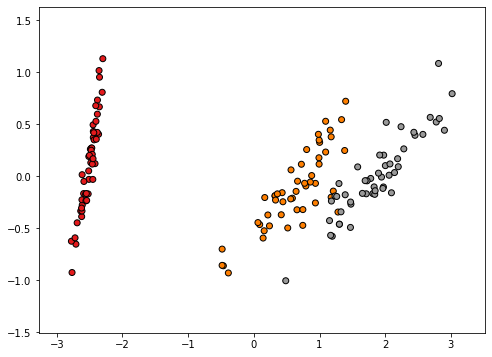

In [52]:
plot(reconstructed_data_pca2d, labels)

**Plotting autoencoded 2d data**

In [59]:
weights = autoencoder.encoder.get_weights()
encoder = tf.keras.Sequential([
      layers.Flatten(input_shape=[4]),
      layers.Dense(150, activation='relu'),
      layers.BatchNormalization(),
      layers.Dropout(0.2),
      layers.Dense(50, activation='relu'),
      layers.Dropout(0.1),
      layers.Dense(25, activation='relu'),
      layers.Dense(latent_dim)
    ])
encoder.set_weights(weights)

In [60]:
encoder.compile(optimizer='adam', loss=losses.MeanSquaredError())

In [61]:
reconstructed_data_enc2d = encoder.predict(data)

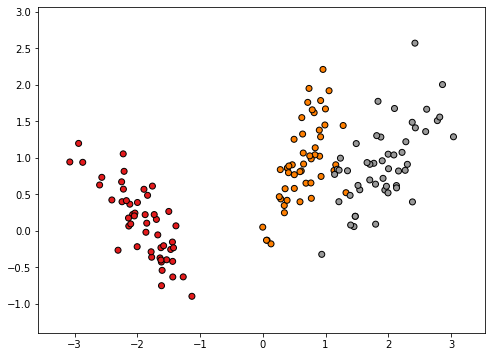

In [62]:
plot(reconstructed_data_enc2d, labels)